In [23]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [4]:
X, y = fetch_california_housing(return_X_y=True)

xtrainF, xtestF, ytrainF, ytestF = train_test_split(X, y, random_state=42 ,test_size=0.25)

xtrain, xvalid , ytrain , yvalid = train_test_split(xtrainF, ytrainF, random_state=42, test_size=0.25)

In [5]:
xtrain = StandardScaler().fit_transform(xtrain)
xvalid = StandardScaler().fit_transform(xvalid)
xtestF = StandardScaler().fit_transform(xtestF)

# Modelo wide e deep 

In [6]:
import keras

In [7]:
input_  = keras.layers.Input(shape=xtrain.shape[1:])
oculto1 = keras.layers.Dense(30, activation='relu')(input_)
oculto2 = keras.layers.Dense(30, activation='relu')(oculto1)
concat  = keras.layers.Concatenate()([input_,oculto2])
output  = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_],outputs=[output])

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

In [9]:
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=1e-3),
    loss      = keras.losses.mean_squared_error,
)
history = model.fit(xtrain, ytrain, epochs=20, validation_data=(xvalid,yvalid), batch_size=32)

Epoch 1/20

363/363 [==============================] - 2s 3ms/step - loss: 2.3743 - val_loss: 0.8300
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7621 - val_loss: 0.6901
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6724 - val_loss: 0.6465
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6307 - val_loss: 0.6186
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6005 - val_loss: 0.5965
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5755 - val_loss: 0.5775
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5545 - val_loss: 0.5621
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5365 - val_loss: 0.5510
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5206 - val_loss: 0.5374
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5060 - val_loss: 0.527

In [10]:
model.evaluate(xtestF)

162/162 [==============================] - 0s 2ms/step - loss: 0.0000e+00


0.0

In [11]:
predict = model.predict(xtestF)

162/162 [==============================] - 0s 2ms/step


In [12]:
mean_absolute_error(ytestF,predict), mean_squared_error(ytestF, predict), r2_score(ytestF, predict)

(0.46819358660931, 0.41405791976903117, 0.687082637222366)

### Diversas entradas

In [30]:
xtrainA, xtrainB = xtrain[:,:5], xtrain[:,2:]
xvalidA, xvalidB = xvalid[:,:5], xvalid[:,2:]

xtestA, xtestB = xtestF[:,:5], xtestF[:,2:]

In [21]:
input_A = keras.layers.Input(shape=xtrainA.shape[1:], name='wideInput')
input_B = keras.layers.Input(shape=xtrainB.shape[1:], name='deepInput')

oculta1 = keras.layers.Dense(30, activation='relu', name='Camada_oculta1')(input_B)
oculta2 = keras.layers.Dense(30, activation='relu', name='Camada_oculta2')(oculta1)

concat = keras.layers.Concatenate(name='concat')([input_A,oculta2])

output = keras.layers.Dense(1, name='saida')(concat)

model = keras.Model(inputs=[input_A,input_B], outputs=[output])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deepInput (InputLayer)      [(None, 6)]                  0         []                            
                                                                                                  
 Camada_oculta1 (Dense)      (None, 30)                   210       ['deepInput[0][0]']           
                                                                                                  


 wideInput (InputLayer)      [(None, 5)]                  0         []                            
                                                                                                  
 Camada_oculta2 (Dense)      (None, 30)                   930       ['Camada_oculta1[0][0]']      
                                                                                                  
 concat (Concatenate)        (None, 35)                   0         ['wideInput[0][0]',           
                                                                     'Camada_oculta2[0][0]']      
                                                                                                  
 saida (Dense)               (None, 1)                    36        ['concat[0][0]']              
                                                                                                  
Total params: 1176 (4.59 KB)
Trainable params: 1176 (4.59 KB)
Non-trainable params: 0 (0.00 Byte)
___________

In [22]:
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=1e-3),
    loss      = keras.losses.mean_squared_error,
    metrics   = [keras.metrics.mean_absolute_error] 
    )
history =  model.fit((xtrainA, xtrainB) , ytrain, epochs=20, validation_data=((xvalidA,xvalidB),yvalid))

Epoch 1/20

363/363 [==============================] - 2s 3ms/step - loss: 2.1020 - mean_absolute_error: 0.9940 - val_loss: 1.4437 - val_mean_absolute_error: 0.8395
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8437 - mean_absolute_error: 0.6652 - val_loss: 0.7046 - val_mean_absolute_error: 0.6325
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6656 - mean_absolute_error: 0.6077 - val_loss: 0.6396 - val_mean_absolute_error: 0.5911
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6177 - mean_absolute_error: 0.5795 - val_loss: 0.6115 - val_mean_absolute_error: 0.5813
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5847 - mean_absolute_error: 0.5617 - val_loss: 0.5854 - val_mean_absolute_error: 0.5669
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5583 - mean_absolute_error: 0.5470 - val_loss: 0.5646 - val_mean_absolute_error: 0.5549
Epoch 7/20
363/

<Axes: >

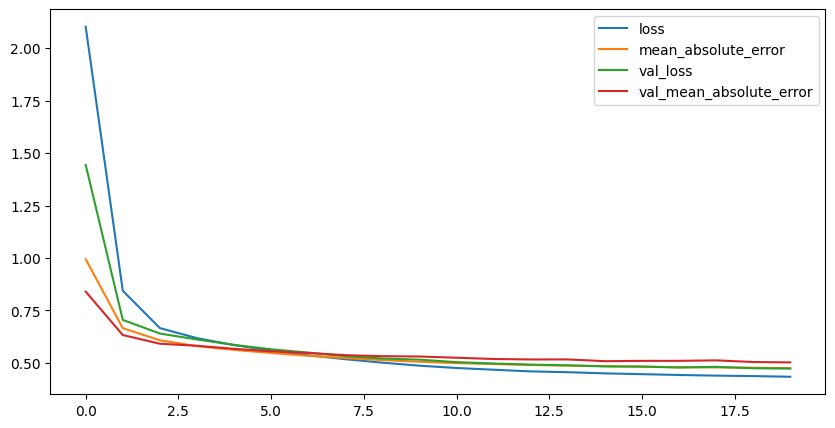

In [28]:
pd.DataFrame(history.history).plot(figsize=(10,5))

In [31]:
model.evaluate((xtestA,xtestB))

162/162 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mean_absolute_error: 0.0000e+00


[0.0, 0.0]

In [40]:
predict = model.predict((xtestA,xtestB))

162/162 [==============================] - 1s 3ms/step


In [43]:
mean_absolute_error(ytestF,predict), mean_squared_error(ytestF, predict), r2_score(ytestF, predict)

(0.48344372840530375, 0.43287101812022577, 0.6728649521095781)

### adicionar uma saida para regularização